# Лабораторна робота №2

#### Тема: Аналіз багатовимірного часового ряду

#### Виконали студенти груп КА-21 та КА-24 Акименко Валерія, Герман Вікторія, Жигалов Олександр, Людоговська Анна.

### _Імпортування бібліотек_

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### _Завдання 1_

Посилання на часовий ряд: https://www.kaggle.com/datasets/rohitgrewal/weather-data

In [37]:
df_original = pd.read_csv('dataset/Project 1 - Weather Dataset.csv')
df_original

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


Спостереження ведеться кожну годину з 01.01.2012 до 31.12.2012

Кількість записів: 8774

Кількість атрибутів: 8

Кількісні атрибути: Temp_C; Dew Point Temp_C; Rel Hum_%; Wind Speed_km/h; Visibility_km; Press_kPa

Якісні атрибути: Date/Time; Weather

### _Завдання 2_

In [38]:
def heatmap(val, cbar, desc):
    df_original['Date/Time'] = pd.to_datetime(df_original['Date/Time'])
    df_original['Month'] = df_original['Date/Time'].dt.month
    df_original['Hour'] = df_original['Date/Time'].dt.hour

    pivot = df_original.pivot_table(values=f'{val}', index='Hour', columns='Month', aggfunc='mean')

    plt.figure(figsize=(10, 5))
    sns.heatmap(pivot,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                cbar_kws={'label': f'{cbar}'})

    plt.title(f'Середня {desc} за годинами доби та місяцями')
    plt.xlabel('Місяць')
    plt.ylabel('Година')


    plt.xticks(ticks=[x + 0.5 for x in range(12)],
               labels=['Січень', 'Лютий', 'Березень', 'Квітень', 'Травень', 'Червень', 'Липень', 'Серпень', 'Вересень', 'Жовтень', 'Листопад', 'Грудень'])

    plt.tight_layout()

Температура

In [39]:
print(f'Мінімальна температура: {float(df_original['Temp_C'].min())}\n'
      f'Максимальна температура: {float(df_original['Temp_C'].max())}\n'
      f'Середня температура: {float(df_original['Temp_C'].mean())}\n'
      f'Медіана температури: {float(df_original['Temp_C'].median())}')

Мінімальна температура: -23
Максимальна температура: 33
Середня температура: 8
Медіана температури: 9


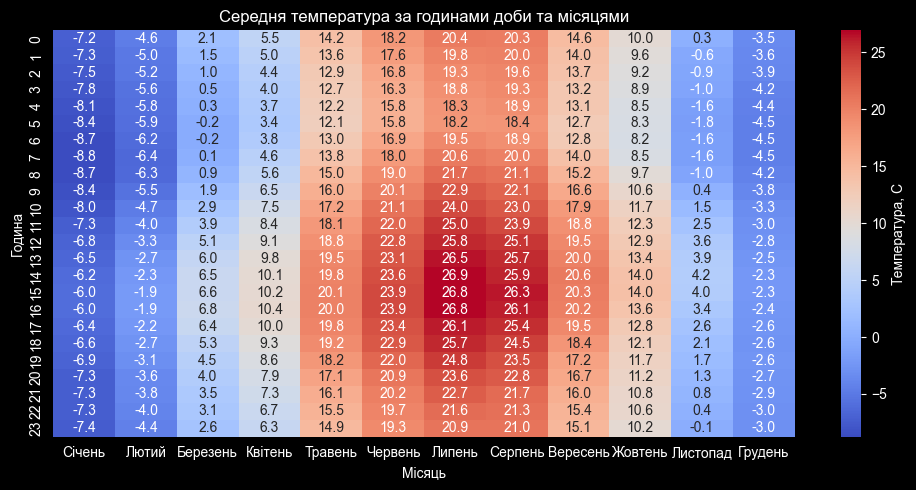

In [40]:
heatmap('Temp_C', 'Температура, C', 'температура')

Температура точки роси

In [41]:
print(f'Мінімальна температура точки роси: {float(df_original['Dew Point Temp_C'].min())}\n'
      f'Максимальна температура точки роси: {float(df_original['Dew Point Temp_C'].max())}\n'
      f'Середня температура точки роси: {float(df_original['Dew Point Temp_C'].mean())}\n'
      f'Медіана температури точки роси: {float(df_original['Dew Point Temp_C'].median())}')

Мінімальна температура точки роси: -28
Максимальна температура точки роси: 24
Середня температура точки роси: 2
Медіана температури точки роси: 3


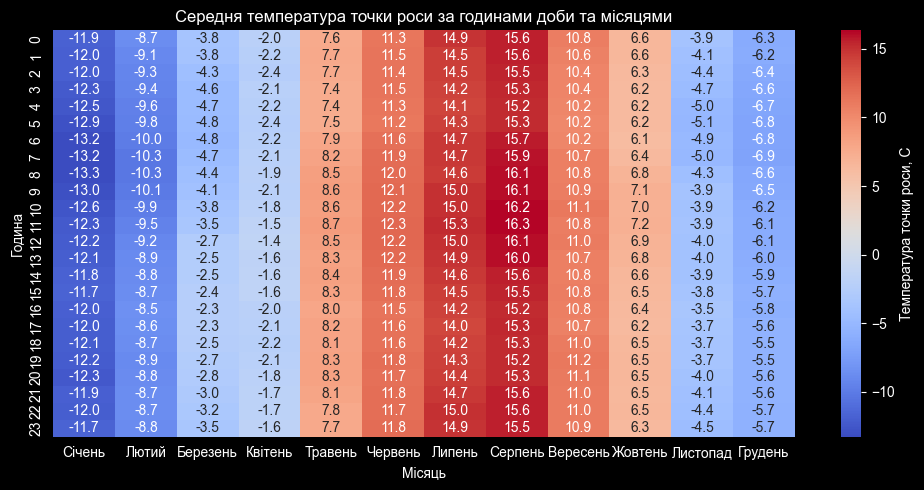

In [42]:
heatmap('Dew Point Temp_C', 'Температура точки роси, C', 'температура точки роси')

Вологість повітря

In [43]:
print(f'Мінімальна вологість повітря: {float(df_original['Rel Hum_%'].min())}\n'
      f'Максимальна вологість повітря: {float(df_original['Rel Hum_%'].max())}\n'
      f'Середня вологість повітря: {float(df_original['Rel Hum_%'].mean())}\n'
      f'Медіана вологості повітря: {float(df_original['Rel Hum_%'].median())}')

Мінімальна вологість повітря: 18
Максимальна вологість повітря: 100
Середня вологість повітря: 67
Медіана вологості повітря: 68


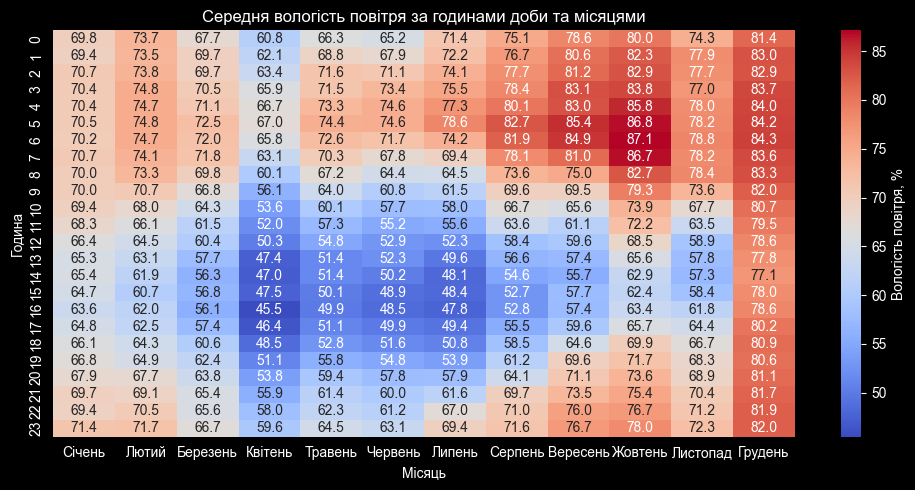

In [44]:
heatmap('Rel Hum_%', 'Вологість повітря, %', 'вологість повітря')

Швидкість повітря

In [45]:
print(f'Мінімальна швидкість повітря: {float(df_original['Wind Speed_km/h'].min())}\n'
      f'Максимальна швидкість повітря: {float(df_original['Wind Speed_km/h'].max())}\n'
      f'Середня швидкість повітря: {float(df_original['Wind Speed_km/h'].mean())}\n'
      f'Медіана швидкості повітря: {float(df_original['Wind Speed_km/h'].median())}')

Мінімальна швидкість повітря: 0
Максимальна швидкість повітря: 83
Середня швидкість повітря: 14
Медіана швидкості повітря: 13


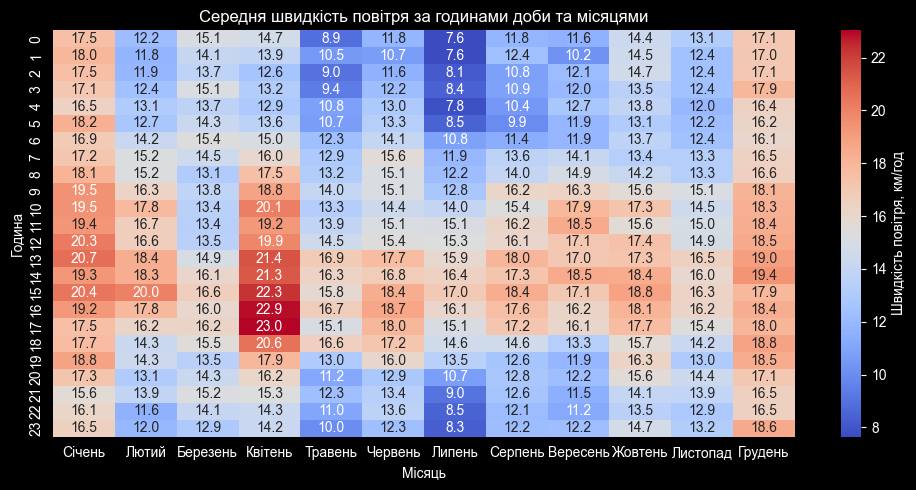

In [46]:
heatmap('Wind Speed_km/h', 'Швидкість повітря, км/год', 'швидкість повітря')

Видимість

In [49]:
print(f'Мінімальна видимість: {float(df_original['Visibility_km'].min())}\n'
      f'Максимальна видимість: {float(df_original['Visibility_km'].max())}\n'
      f'Середня видимість: {float(df_original['Visibility_km'].mean())}\n'
      f'Медіана видимості: {float(df_original['Visibility_km'].median())}')

Мінімальна видимість: 0.2
Максимальна видимість: 48.3
Середня видимість: 27.664446721311474
Медіана видимість: 25.0


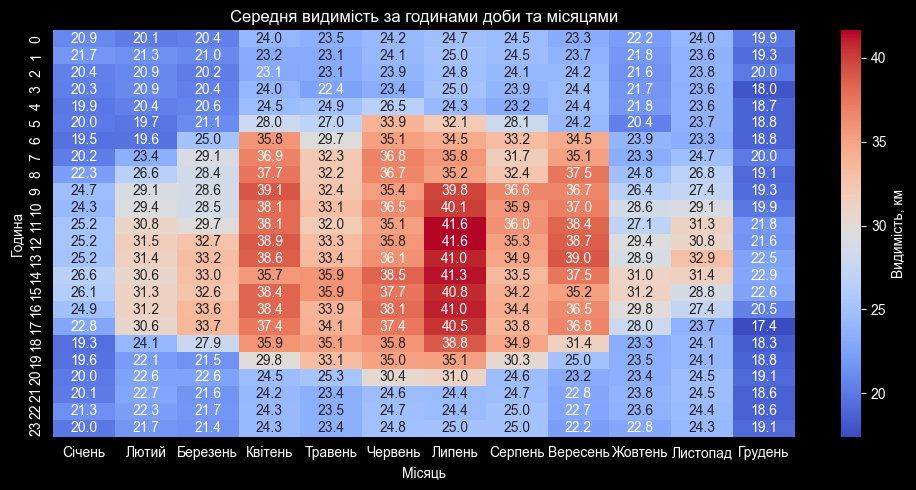

In [48]:
heatmap('Visibility_km', 'Видимість, км', 'видимість')

Атмосферний тиск

In [50]:
print(f'Мінімальний тиск: {float(df_original['Press_kPa'].min())}\n'
      f'Максимальний тиск: {float(df_original['Press_kPa'].max())}\n'
      f'Середній тиск: {float(df_original['Press_kPa'].mean())}\n'
      f'Медіана тиску: {float(df_original['Press_kPa'].median())}')

Мінімальний тиск: 97.52
Максимальний тиск: 103.65
Середній тиск: 101.05162340619307
Медіана тиску: 101.07


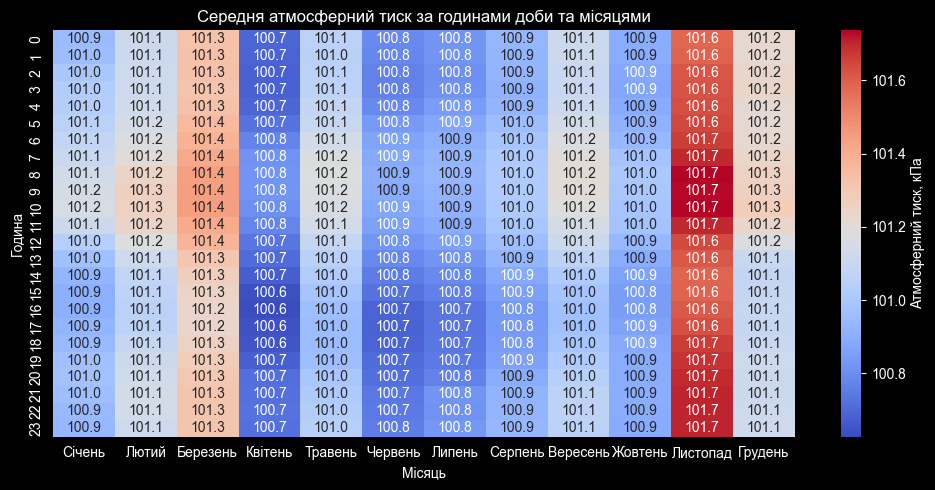

In [51]:
heatmap('Press_kPa', 'Атмосферний тиск, кПа', 'атмосферний тиск')

**Перевірки на пропуски**

In [53]:
print(f"Пропуски температур: {int(df_original['Temp_C'].isnull().sum())}\n"
      f"Пропуски температур точки роси: {int(df_original['Dew Point Temp_C'].isnull().sum())}\n"
      f"Пропуски вологості повітря: {int(df_original['Rel Hum_%'].isnull().sum())}\n"
      f"Пропуски швидкості повітря: {int(df_original['Wind Speed_km/h'].isnull().sum())}\n"
      f"Пропуски видимості: {int(df_original['Visibility_km'].isnull().sum())}\n"
      f"Пропуски атмосферного тиску: {int(df_original['Press_kPa'].isnull().sum())}\n")

Пропуски температур: 0
Пропуски температур точки роси: 0
Пропуски вологості повітря: 0
Пропуски швидкості повітря: 0
Пропуски видимості: 0
Пропуски атмосферного тиску: 0



У часовому ряді повністю відсутні пропуски. Заповнення не треба

### _Завдання 3_